In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

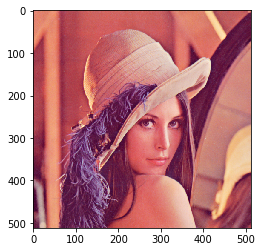

In [2]:
img = cv2.imread('Lenna.png')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

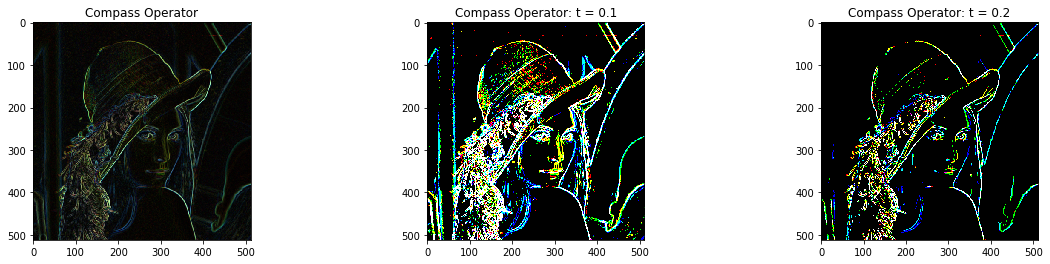

In [3]:
img = np.float32(img)

# Matrix definition
mat = {}
mat["topLeft"] = np.array(([1,1,0],[1,0,-1],[0,-1,-1]), dtype="float32")
mat["top"] = np.array(([1,1,1],[0,0,0],[-1,-1,-1]), dtype="float32")
mat["topRight"] = np.array(([0,1,1],[-1,0,1],[-1,-1,0]), dtype="float32")
mat["right"] = np.array(([-1,0,1],[-1,0,1],[-1,0,1]), dtype="float32")
mat["bottomRight"] = np.array(([-1,-1,0],[-1,0,1],[0,1,1]), dtype="float32")
mat["bottom"] = np.array(([-1,-1,-1],[0,0,0],[1,1,1]), dtype="float32")
mat["bottomLeft"] = np.array(([0,-1,-1],[1,0,-1],[1,1,0]), dtype="float32")
mat["left"] = np.array(([1,0,-1],[1,0,-1],[1,0,-1]), dtype="float32")

for key in mat.keys():
    f = cv2.filter2D(img, -1, mat[key])
    f = abs(f)
    mat[key] = f / np.amax(f[:])

max_img = mat["topLeft"]
for key in mat.keys():
    max_img = np.maximum(max_img, mat[key])

# Different thresholds
ret1,thresh1 = cv2.threshold(max_img, 0.1, 1, cv2.THRESH_BINARY)
ret2,thresh2 = cv2.threshold(max_img, 0.2, 1, cv2.THRESH_BINARY)

plt.rcParams["figure.figsize"] = (20, 4)

plt.subplot(131)
plt.imshow(max_img)
plt.title('Compass Operator')

plt.subplot(132)
plt.imshow(thresh1)
plt.title('Compass Operator: t = 0.1')

plt.subplot(133)
plt.imshow(thresh2)
plt.title('Compass Operator: t = 0.2')

plt.show()

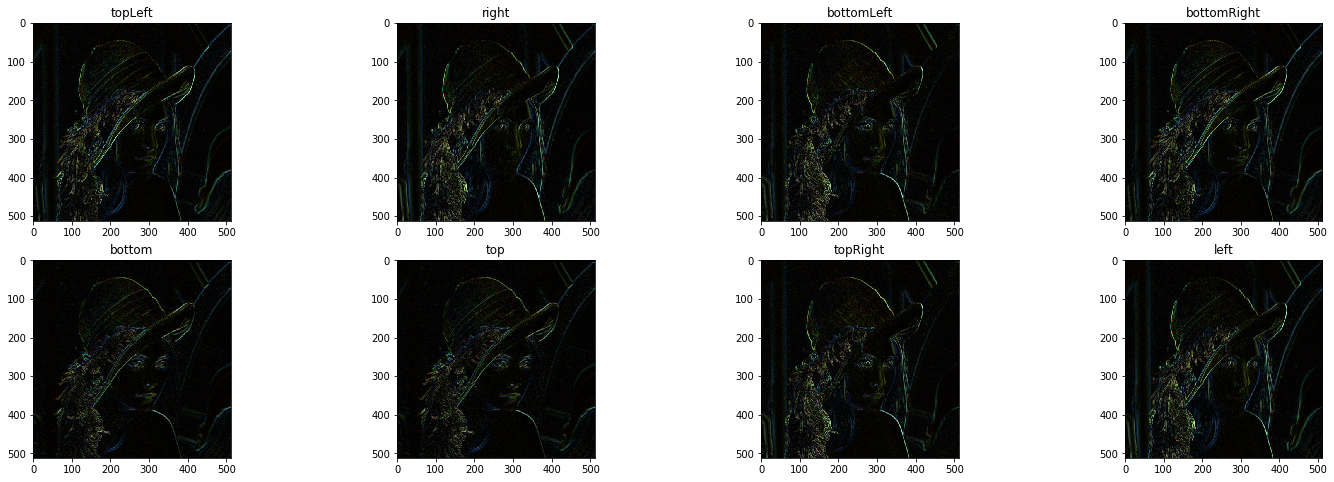

In [21]:
plt.rcParams["figure.figsize"] = (25, 8)
pos = [2, 4, 1]
for key in mat.keys():
    plt.subplot(pos[0], pos[1], pos[2])
    plt.imshow(mat[key])
    plt.title(key)
    pos[2] = pos[2] + 1
plt.show()